Text Preprocessing for Therepeutical Sessions



In [1]:
!pip install spacy==2.2.3
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
!pip install pycaret --quiet






Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-tqhk625o
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-tqhk625o
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=5c46057843c2e953a4ee78549e12f1c369dc9af01cdf4111f9bcb0a93f62a52c
  Stored in directory: /tmp/pip-ephem-wheel-cache-0rdwkt7v/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    F

In [3]:
import numpy as np
import pandas as pd
import os
import nltk
import nltk.corpus

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_json('/content/clean_language_transcripts.json')

In [5]:
df.head()

,source,name,message
0,CLEAN LANGUAGE WEB,B,I want to go back down the hole and pick u...
1,CLEAN LANGUAGE WEB,K,And you want to go back down the hole and ...
2,CLEAN LANGUAGE WEB,B,All the way down. [Several deep yawns]
3,CLEAN LANGUAGE WEB,K,And is there anything else about all the w...
4,CLEAN LANGUAGE WEB,B,"Ummm, Ummm, Ummm, all the way down is [dee..."


In [6]:
df.shape

(1597, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1596
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   source   1597 non-null   object
 1   name     1597 non-null   object
 2   message  1597 non-null   object
dtypes: object(3)
memory usage: 49.9+ KB


In [8]:
#Check first 500 Words

for word in df[:500]:
  print(df.message, sep=' ', end=' ')

0           I want to go back down the hole and pick u...
1           And you want to go back down the hole and ...
2                  All the way down. [Several deep yawns]
3           And is there anything else about all the w...
4           Ummm, Ummm, Ummm, all the way down is [dee...
                              ...                        
1592           There’s space here. Things seem different.
1593     And now there’s space and things seem differe...
1594                                          Yes, I can.
1595     And is there anything else you need now that ...
1596        No. I’m feeling very weird. It’s amazing w...
Name: message, Length: 1597, dtype: object 0           I want to go back down the hole and pick u...
1           And you want to go back down the hole and ...
2                  All the way down. [Several deep yawns]
3           And is there anything else about all the w...
4           Ummm, Ummm, Ummm, all the way down is [dee...
                             

In [9]:
#Tokenize Text
from nltk.tokenize import word_tokenize
df['message'] = df['message'].apply(word_tokenize)

In [10]:
df['message']

0       [I, want, to, go, back, down, the, hole, and, ...
1       [And, you, want, to, go, back, down, the, hole...
2       [All, the, way, down, ., [, Several, deep, yaw...
3       [And, is, there, anything, else, about, all, t...
4       [Ummm, ,, Ummm, ,, Ummm, ,, all, the, way, dow...
                              ...                        
1592    [There, ’, s, space, here, ., Things, seem, di...
1593    [And, now, there, ’, s, space, and, things, se...
1594                                  [Yes, ,, I, can, .]
1595    [And, is, there, anything, else, you, need, no...
1596    [No, ., I, ’, m, feeling, very, weird, ., It, ...
Name: message, Length: 1597, dtype: object

In [11]:
len(df['message'])

1597

In [12]:
x = df['message']

In [13]:
!pip install spacy --quiet
!python -m spacy download en_core_web_sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 12.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [14]:
type(x)

pandas.core.series.Series

In [15]:
from nltk.tokenize import sent_tokenize
x = sent_tokenize(str(x))

In [16]:
print(x)

['0       [I, want, to, go, back, down, the, hole, and, ...\n1       [And, you, want, to, go, back, down, the, hole...\n2       [All, the, way, down, ., [, Several, deep, yaw...\n3       [And, is, there, anything, else, about, all, t...\n4       [Ummm, ,, Ummm, ,, Ummm, ,, all, the, way, dow...\n                              ...                        \n1592    [There, ’, s, space, here, ., Things, seem, di...\n1593    [And, now, there, ’, s, space, and, things, se...\n1594                                  [Yes, ,, I, can, .]', '1595    [And, is, there, anything, else, you, need, no...\n1596    [No, ., I, ’, m, feeling, very, weird, ., It, ...\nName: message, Length: 1597, dtype: object']


In [17]:
type(x)

list

In [18]:
x_str = str(x)

In [19]:
print(x_str)

['0       [I, want, to, go, back, down, the, hole, and, ...\n1       [And, you, want, to, go, back, down, the, hole...\n2       [All, the, way, down, ., [, Several, deep, yaw...\n3       [And, is, there, anything, else, about, all, t...\n4       [Ummm, ,, Ummm, ,, Ummm, ,, all, the, way, dow...\n                              ...                        \n1592    [There, ’, s, space, here, ., Things, seem, di...\n1593    [And, now, there, ’, s, space, and, things, se...\n1594                                  [Yes, ,, I, can, .]', '1595    [And, is, there, anything, else, you, need, no...\n1596    [No, ., I, ’, m, feeling, very, weird, ., It, ...\nName: message, Length: 1597, dtype: object']


In [20]:
#Blank line count
from nltk.tokenize import blankline_tokenize
x_blank = blankline_tokenize(x_str)
len(x_blank)

1

In [21]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist
fdist(x)

FreqDist({'0       [I, want, to, go, back, down, the, hole, and, ...\n1       [And, you, want, to, go, back, down, the, hole...\n2       [All, the, way, down, ., [, Several, deep, yaw...\n3       [And, is, there, anything, else, about, all, t...\n4       [Ummm, ,, Ummm, ,, Ummm, ,, all, the, way, dow...\n                              ...                        \n1592    [There, ’, s, space, here, ., Things, seem, di...\n1593    [And, now, there, ’, s, space, and, things, se...\n1594                                  [Yes, ,, I, can, .]': 1, '1595    [And, is, there, anything, else, you, need, no...\n1596    [No, ., I, ’, m, feeling, very, weird, ., It, ...\nName: message, Length: 1597, dtype: object': 1})

In [22]:
len(x)

2

In [23]:
#Bigram, Trigram, and Ngram creation
from nltk.util import bigrams, trigrams, ngrams
x_bigrams = nltk.bigrams(x)
x_trigrams = nltk.trigrams(x)
x_ngrams = nltk.ngrams(x, 4)

In [24]:
#Stemming using Porter / Lancaster / Snowball Stemmers
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
stem_test = ('be','is','am', 'are', 'been', 'being')
for words in stem_test:
  print(words, ':', ps.stem(words))

be : be
is : is
am : am
are : are
been : been
being : be


In [26]:
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
for words in stem_test:
  print(words, ':', lst.stem(words))

be : be
is : is
am : am
are : ar
been : been
being : being


In [27]:
from nltk.stem import SnowballStemmer
sbst = SnowballStemmer('english')
for words in stem_test:
  print(words, ':', sbst.stem(words))

be : be
is : is
am : am
are : are
been : been
being : be


In [28]:
for words in x:
  print(words, ':', sbst.stem(words))

0       [I, want, to, go, back, down, the, hole, and, ...
1       [And, you, want, to, go, back, down, the, hole...
2       [All, the, way, down, ., [, Several, deep, yaw...
3       [And, is, there, anything, else, about, all, t...
4       [Ummm, ,, Ummm, ,, Ummm, ,, all, the, way, dow...
                              ...                        
1592    [There, ’, s, space, here, ., Things, seem, di...
1593    [And, now, there, ’, s, space, and, things, se...
1594                                  [Yes, ,, I, can, .] : 0       [i, want, to, go, back, down, the, hole, and, ...
1       [and, you, want, to, go, back, down, the, hole...
2       [all, the, way, down, ., [, several, deep, yaw...
3       [and, is, there, anything, else, about, all, t...
4       [ummm, ,, ummm, ,, ummm, ,, all, the, way, dow...
                              ...                        
1592    [there, ', s, space, here, ., things, seem, di...
1593    [and, now, there, ', s, space, and, things, se...
1594        

In [29]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
word_lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
#Test Lemmatizer
word_lem.lemmatize('cooperation')

'cooperation'

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
len(stopwords.words('english'))

179

In [33]:
import preprocess_kgptalkie as ps
import re
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [34]:
get_clean(x)

'0 i want to go back down the hole and n1 and you want to go back down the holen2 all the way down several deep yawn3 and is there anything else about all tn4 um um um all the way dowand n1592 there s space here things seem din1593 and now there s space and things sen1594 yes i can 1595 and is there anything else you need non1596 no i m feeling very weird it nname message length 1597 dtype object'

In [35]:
clean_x = get_clean(x)

In [36]:
print(clean_x)

0 i want to go back down the hole and n1 and you want to go back down the holen2 all the way down several deep yawn3 and is there anything else about all tn4 um um um all the way dowand n1592 there s space here things seem din1593 and now there s space and things sen1594 yes i can 1595 and is there anything else you need non1596 no i m feeling very weird it nname message length 1597 dtype object


In [37]:
#Parts of Speech
nltk.download('averaged_perceptron_tagger')
tokens = word_tokenize(clean_x)
print(nltk.pos_tag(list(tokens)))

[('0', 'CD'), ('i', 'NN'), ('want', 'VBP'), ('to', 'TO'), ('go', 'VB'), ('back', 'RB'), ('down', 'RP'), ('the', 'DT'), ('hole', 'NN'), ('and', 'CC'), ('n1', 'NN'), ('and', 'CC'), ('you', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('go', 'VB'), ('back', 'RB'), ('down', 'RP'), ('the', 'DT'), ('holen2', 'NN'), ('all', 'PDT'), ('the', 'DT'), ('way', 'NN'), ('down', 'RP'), ('several', 'JJ'), ('deep', 'JJ'), ('yawn3', 'NN'), ('and', 'CC'), ('is', 'VBZ'), ('there', 'RB'), ('anything', 'NN'), ('else', 'JJ'), ('about', 'IN'), ('all', 'DT'), ('tn4', 'NNS'), ('um', 'JJ'), ('um', 'JJ'), ('um', 'IN'), ('all', 'PDT'), ('the', 'DT'), ('way', 'NN'), ('dowand', 'NN'), ('n1592', 'IN'), ('there', 'EX'), ('s', 'JJ'), ('space', 'NN'), ('here', 'RB'), ('things', 'NNS'), ('seem', 'VBP'), ('din1593', 'NNS'), ('and', 'CC'), ('now', 'RB'), ('there', 'EX'), ('s', 'JJ'), ('space', 'NN'), ('and', 'CC'), ('things', 'NNS'), ('sen1594', 'VBP'), ('yes', 'RB'), ('i', 'NNS'), ('can', 'MD'), ('1595', 'CD'), ('and', 'CC'), ('

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [38]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
x_token = nltk.pos_tag(list(tokens))
x_chunk = ne_chunk(x_token)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [39]:
print(x_chunk)

(S
  0/CD
  i/NN
  want/VBP
  to/TO
  go/VB
  back/RB
  down/RP
  the/DT
  hole/NN
  and/CC
  n1/NN
  and/CC
  you/PRP
  want/VBP
  to/TO
  go/VB
  back/RB
  down/RP
  the/DT
  holen2/NN
  all/PDT
  the/DT
  way/NN
  down/RP
  several/JJ
  deep/JJ
  yawn3/NN
  and/CC
  is/VBZ
  there/RB
  anything/NN
  else/JJ
  about/IN
  all/DT
  tn4/NNS
  um/JJ
  um/JJ
  um/IN
  all/PDT
  the/DT
  way/NN
  dowand/NN
  n1592/IN
  there/EX
  s/JJ
  space/NN
  here/RB
  things/NNS
  seem/VBP
  din1593/NNS
  and/CC
  now/RB
  there/EX
  s/JJ
  space/NN
  and/CC
  things/NNS
  sen1594/VBP
  yes/RB
  i/NNS
  can/MD
  1595/CD
  and/CC
  is/VBZ
  there/RB
  anything/NN
  else/RB
  you/PRP
  need/VBP
  non1596/JJ
  no/DT
  i/JJ
  m/VBP
  feeling/VBG
  very/RB
  weird/JJ
  it/PRP
  nname/JJ
  message/NN
  length/NN
  1597/CD
  dtype/NN
  object/NN)


### **Don't forget to restart the runtime and rerun the notebook**

In [40]:
!pip install Jinja2
!pip install markupsafe==2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [50]:
!pip install -U numpy
!pip install pycocotools==2.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 15.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.5.4 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.6 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import jinja2
from pycaret.nlp import *
Litha = setup(df, target ='message')

Description,Value
session_id,1109
Documents,1597
Vocab Size,719
Custom Stopwords,False


INFO:logs:setup() succesfully completed......................................


In [6]:
#Latent Diralect Allocation
lda = create_model('lda')

INFO:logs:LdaModel(num_terms=719, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [7]:
lda_df = assign_model(lda)

INFO:logs:(1597, 9)
INFO:logs:assign_model() succesfully completed......................................


In [13]:
plot_model(lda, plot='topic_model')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=719, num_topics=4, decay=0.5, chunksize=100), plot=topic_model, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_model
INFO:logs:Preparing pyLDAvis visual


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.171187 -0.245131       1        1  28.027370
3      0.247038  0.191596       2        1  25.915432
0     -0.180871  0.256968       3        1  25.046540
2     -0.237354 -0.203434       4        1  21.010658, topic_info=             Term        Freq       Total Category  logprob  loglift
62           feel  155.000000  155.000000  Default  30.0000  30.0000
162          come  112.000000  112.000000  Default  29.0000  29.0000
3              go  182.000000  182.000000  Default  28.0000  28.0000
601       lozenge  129.000000  129.000000  Default  27.0000  27.0000
287          need   75.000000   75.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
56            let   22.752902   40.263210   Topic4  -4.3020   0.9894
11           else   24.504213   72.480367   Topic4  -4.2278   0.4757
462  relationship   17.432554   27.882326   Topic4  -4.5683   1.0905
660         light   19.062690   45.893111   Topic4  -4.4789   0.6816
412     different   16.397534   38.275115   Topic4  -4.6296   0.7125

[186 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
669       3  0.955990  absorb
606       2  0.946837    acid
266       4  0.962594  always
323       3  0.921053   ankle
630       3  0.956089  attach
...     ...       ...     ...
6         3  0.787432    want
12        3  0.981342     way
553       2  0.952156     win
23        3  0.984465   would
439       3  0.974057   young

[181 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=719, num_topics=4, decay=0.5, chunksize=100), plot=wordcloud, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: wordcloud
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=719, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1597, 9)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting WordCloud()
INFO:logs:Rendering Visual


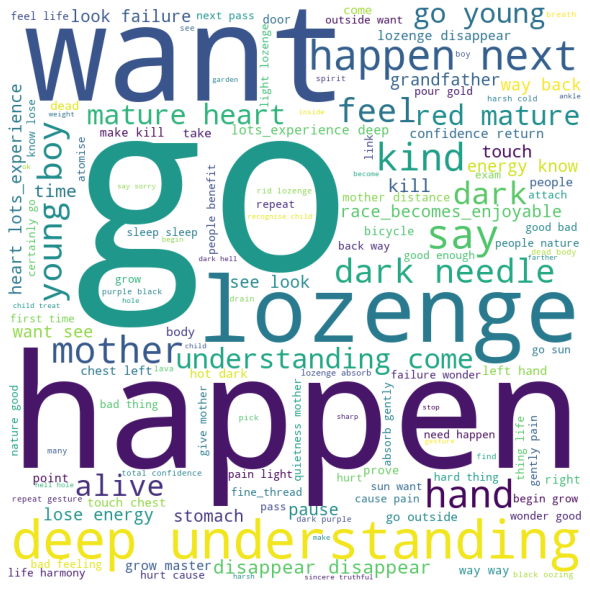

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
plot_model(lda, plot='wordcloud')

In [26]:
#Hierarchical Dirichlet Process
hdp = create_model('hdp')

INFO:logs:<gensim.models.hdpmodel.HdpModel object at 0x7f0ad6f5fed0>
INFO:logs:create_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=<gensim.models.hdpmodel.HdpModel object at 0x7f0ad6f5fed0>, plot=wordcloud, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: wordcloud
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=<gensim.models.hdpmodel.HdpModel object at 0x7f0ad6f5fed0>, verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: hdp
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1597, 8)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting WordCloud()
INFO:logs:Rendering Visual


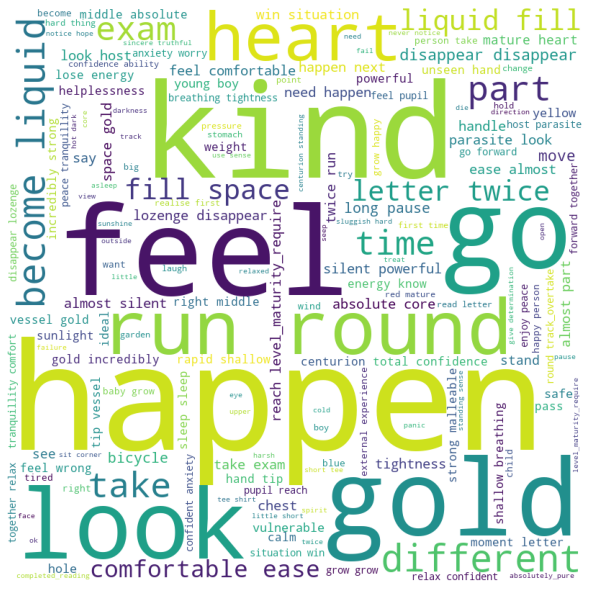

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(hdp, plot='wordcloud')

In [32]:
#Non-Negative Matrix Factorization
nmf = create_model('nmf')

INFO:logs:NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=1109, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)
INFO:logs:create_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=1109, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), plot=wordcloud, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: wordcloud
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=1109, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: nmf
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1597, 9)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting WordCloud()
INFO:logs:Rendering Visual


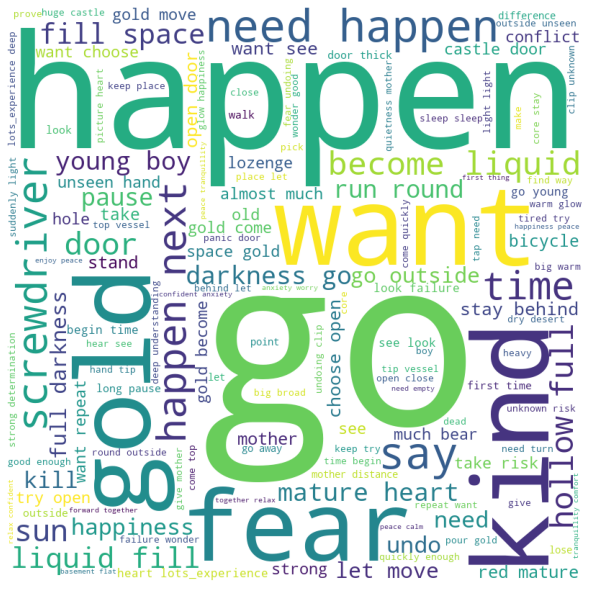

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(nmf, plot='wordcloud')

In [36]:
rp = create_model('rp')

INFO:logs:RpModel(num_terms=719, num_topics=4)
INFO:logs:create_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=RpModel(num_terms=719, num_topics=4), plot=wordcloud, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: wordcloud
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=RpModel(num_terms=719, num_topics=4), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: rp
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1597, 8)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting WordCloud()
INFO:logs:Rendering Visual


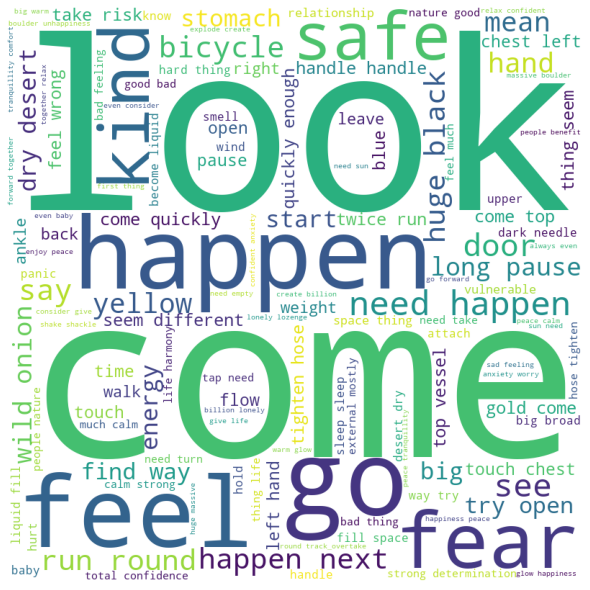

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [44]:
plot_model(rp, plot='wordcloud')